# ENSO metrics recipes

In this notebook we show the ClimWIP method for weighting climate models. We use the new ESMValTool API to reproduce the results, and then modify some settings to show how we can build upon that existing work. Data and compute access are facilitated through the JupyterLab interface hosted at DKRZ. *copied template -2_CLIMwip from github?* 

In [10]:
# The new API is accessible via the esmvalcore.experimental module. These warnings will disappear in the future.

import warnings; warnings.filterwarnings('ignore')
import esmvalcore.experimental as esmvaltool

In [11]:
config = esmvaltool.CFG
# config['max_parallel_tasks'] = 6
config['rootpath']['OBS6'].append(r'/g/data/kj13/datasets/esmvaltool/obsdata-v2') #tier3

In [12]:
# pwd change
%cd '/home/189/fc6164/esmValTool/repos/ENSO_recipes/'
# %pwd

/home/189/fc6164/esmValTool/repos/ENSO_recipes


In [13]:
import os
os.path.abspath("")

'/home/189/fc6164/esmValTool/repos/ENSO_recipes'

In [32]:
clim_1 = esmvaltool.get_recipe('./recipe_diagnostics/climatology_metrics.yml')
clim_2 = esmvaltool.get_recipe('./recipe_diagnostics/recipe_enso_metrics.yml')

In [ ]:
output = clim_1.run('diagnostic_metrics/plot_script')
output ##run only first diagnostic

In [ ]:
output2 = clim_2.run('diagnostic_metrics/plot_script')

{'diagnostic': 'diagnostic_metrics',
 'variable_group': 'tos_seas_asym',
 'dataset': 'HadISST',
 'project': 'OBS',
 'mip': 'Omon',
 'short_name': 'tos',
 'alias': 'OBS',
 'frequency': 'mon',
 'long_name': 'Sea Surface Temperature',
 'modeling_realm': ['ocean'],
 'original_short_name': 'tos',
 'preprocessor': 'enso_seas_asym',
 'recipe_dataset_index': 4,
 'standard_name': 'sea_surface_temperature',
 'tier': 2,
 'type': 'reanaly',
 'units': 'K'}
session: 'recipe_enso_metrics_20241210_004736'.
{'diagnostic': 'diagnostic_metrics',
 'variable_group': 'tos_amp',
 'dataset': 'HadISST',
 'project': 'OBS',
 'mip': 'Omon',
 'short_name': 'tos',
 'alias': 'OBS',
 'frequency': 'mon',
 'long_name': 'Sea Surface Temperature',
 'modeling_realm': ['ocean'],
 'original_short_name': 'tos',
 'preprocessor': 'enso_amplitude',
 'recipe_dataset_index': 4,
 'standard_name': 'sea_surface_temperature',
 'tier': 2,
 'type': 'reanaly',
 'units': 'K'}
session: 'recipe_enso_metrics_20241210_004736'.
{'diagnostic':

ImageFile('ACCESS-CM2_eq_sst_bias.png')
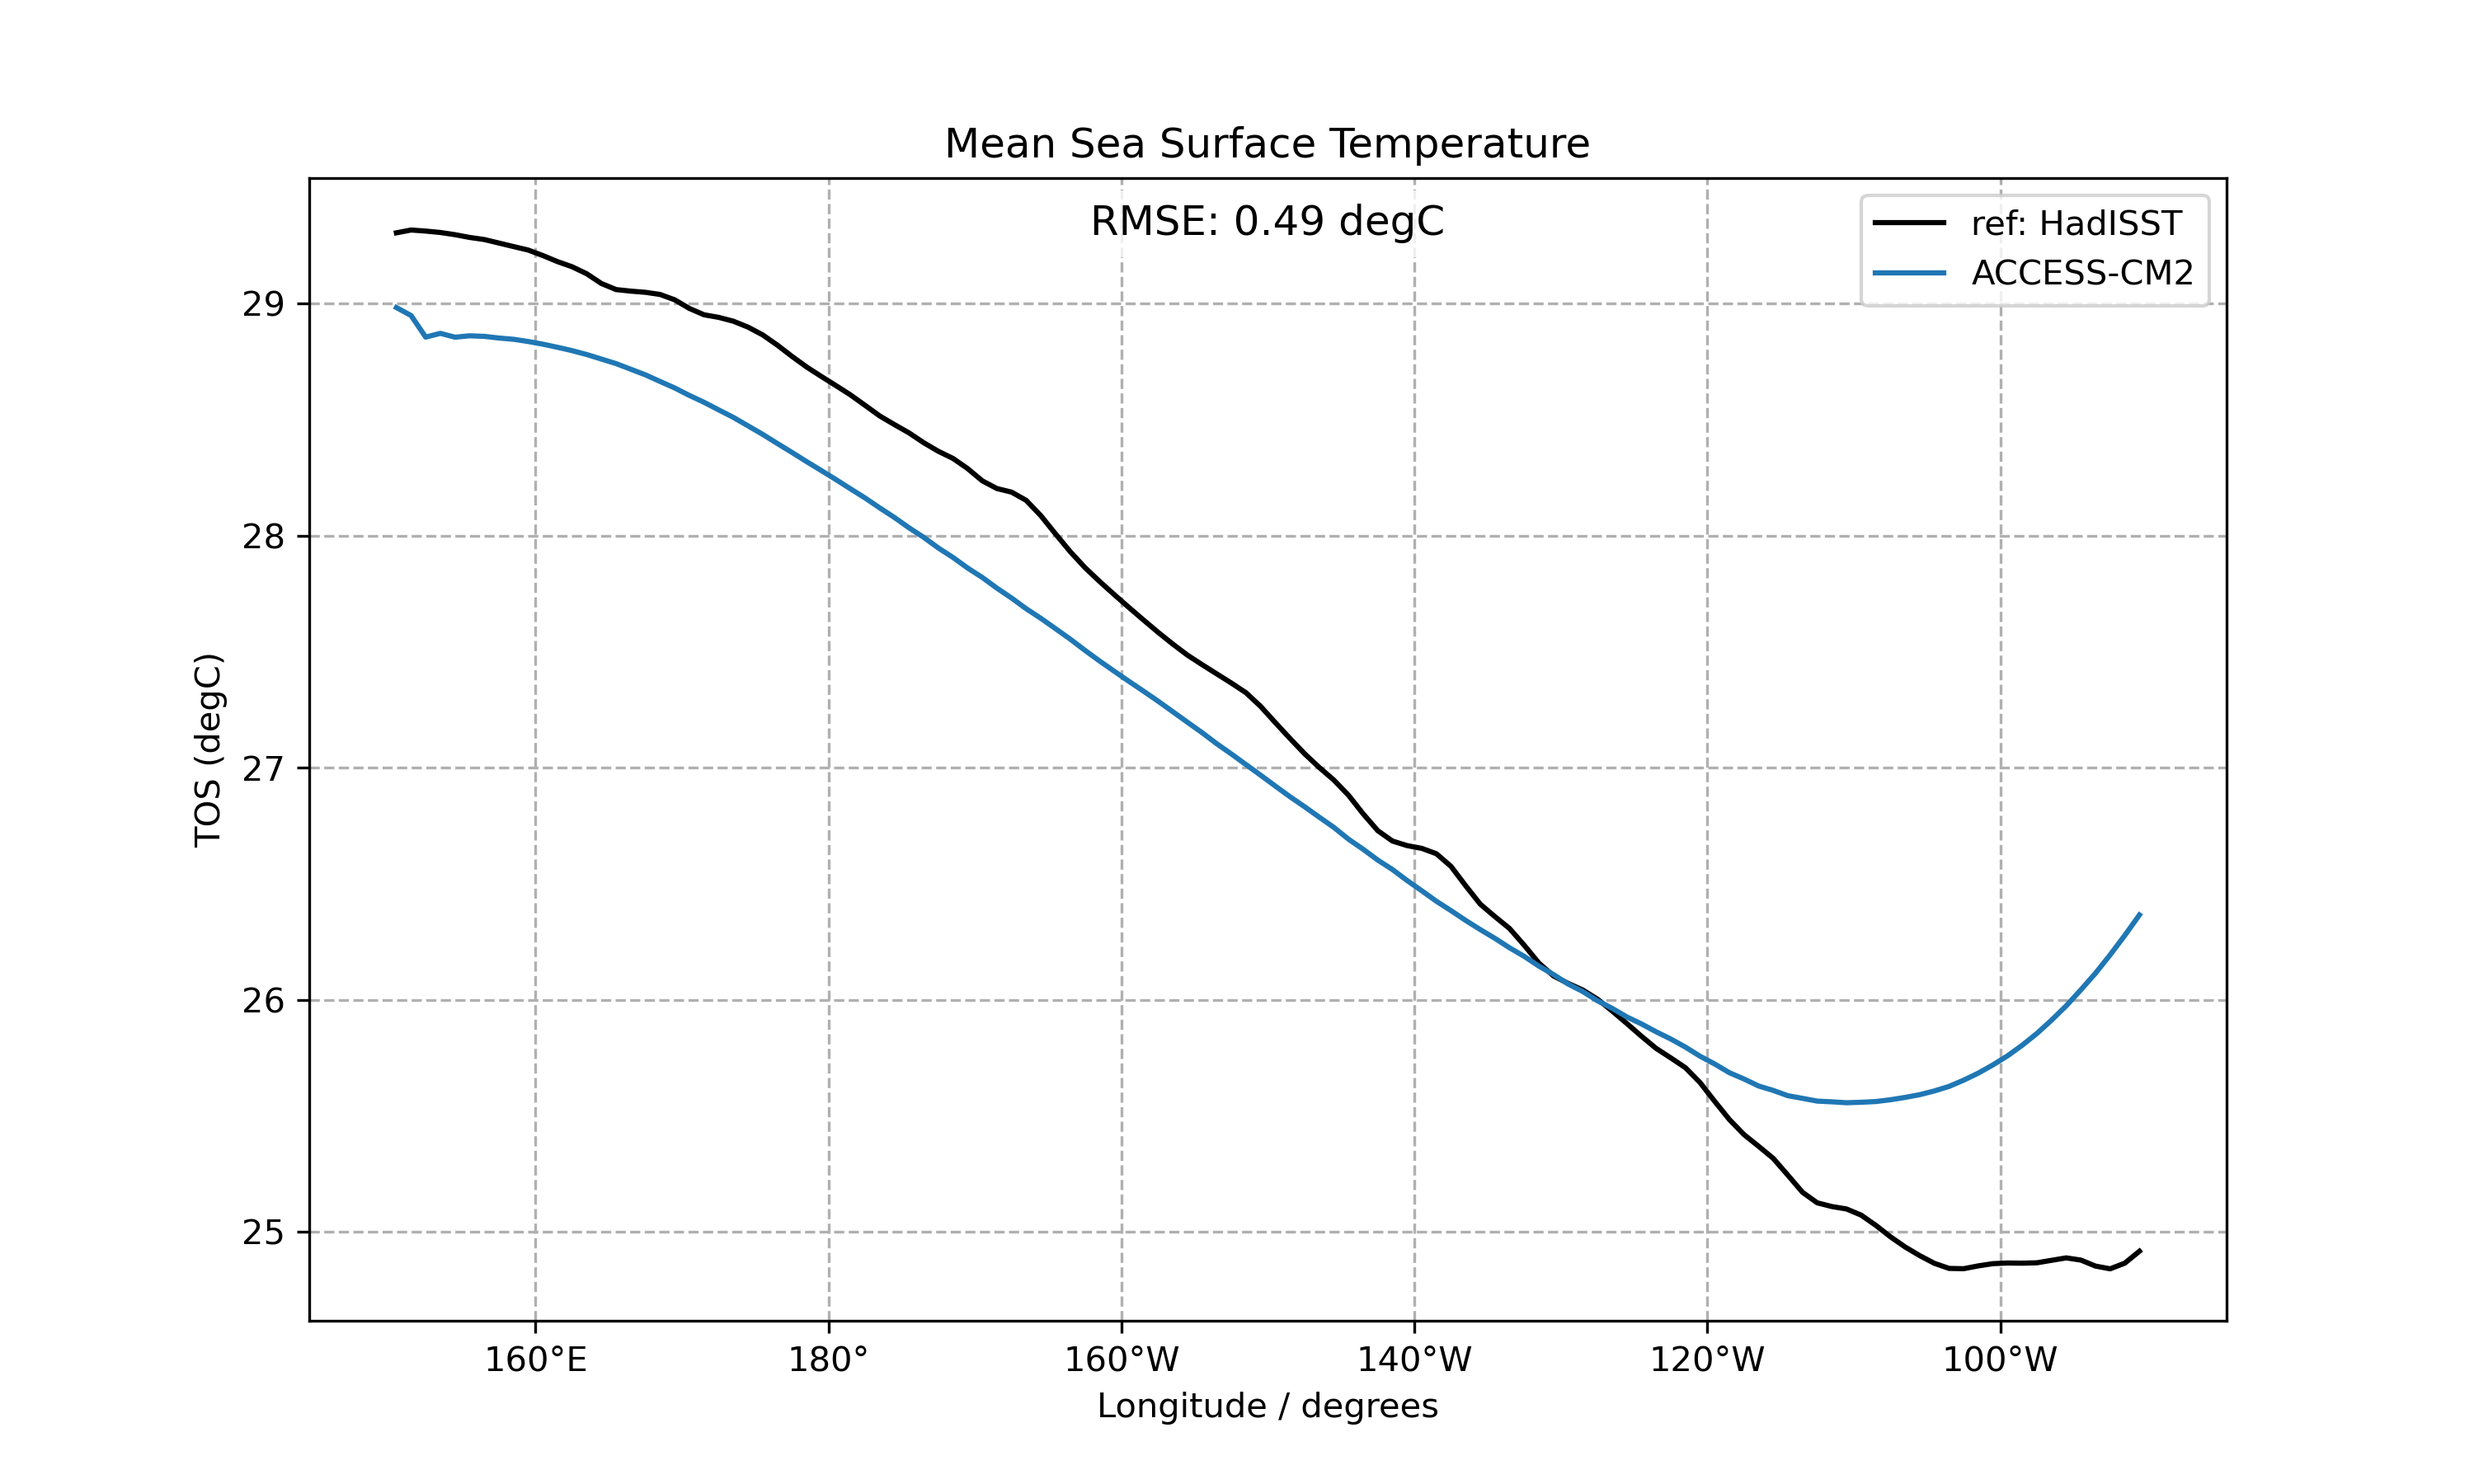

In [17]:
output['diagnostic_metrics/plot_script'][2]


In [29]:
from pathlib import Path
csv_path = '/'.join(str(output['diagnostic_metrics/plot_script'][0].citation_file).split('/')[:-2])
csv_path = csv_path.replace('plots/','work/')
csv_path = Path('/'.join([csv_path,'matrix.csv']))

csv_path

PosixPath('/home/189/fc6164/esmvaltool_output/climatology_metrics_20241210_000453/work/diagnostic_metrics/plot_script/matrix.csv')

In [ ]:
## get csvs, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# basic_pth='/scratch/iq82/fc6164/esmvaltool_output/recipe_ensometrics_20241016_052645/work/diagnostic_metrics/plot_script/matrix.csv'
workpath = "/scratch/iq82/fc6164/esmvaltool_output/recipe_enso_metrics_20241127_024615/work/diagnostic_metrics/plot_script/matrix.csv"

basicdf = pd.read_csv(csv_path,header=None)
metric_df = pd.read_csv(workpath, header=None)

metric_df = pd.concat([basicdf]) #,metric_df
metric_df.shape

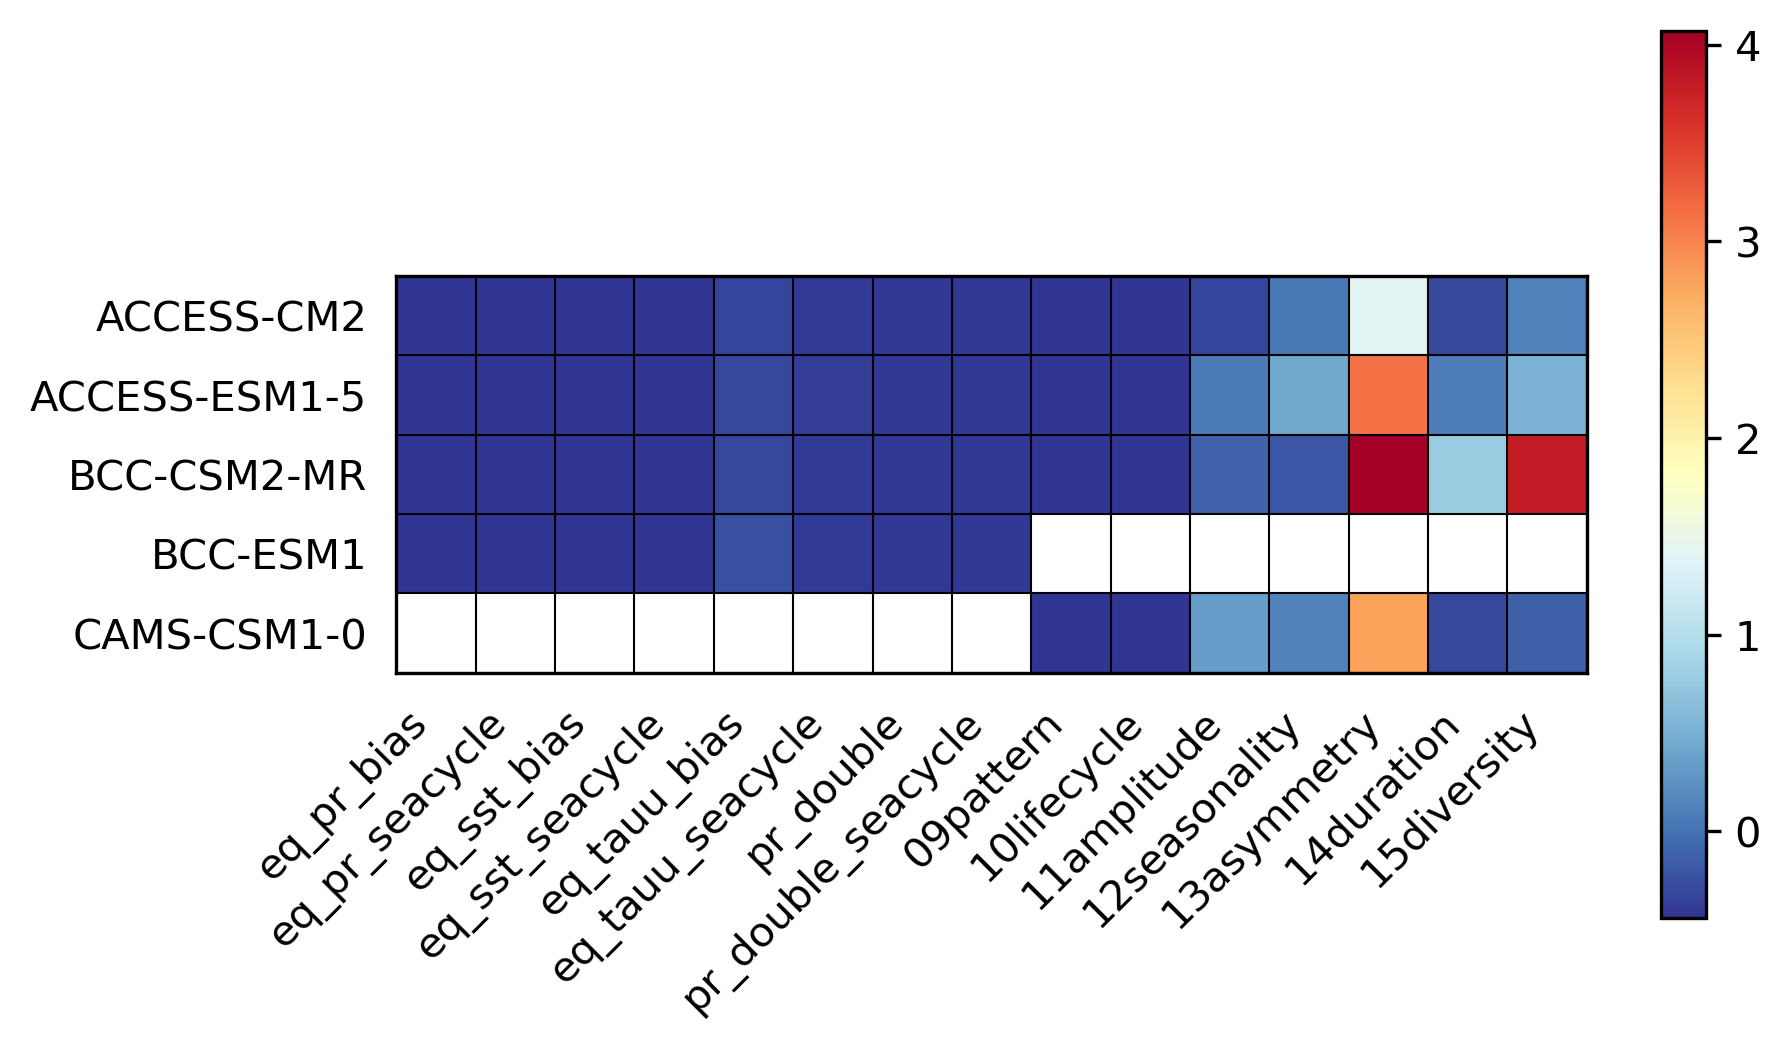

In [31]:
# run normalisation on all these values
metric_df[2] = (metric_df[2]-metric_df[2].mean())/metric_df[2].std()

transformls = []
for mod in metric_df[0].unique(): #iterate model, translate metrics
    df = metric_df.loc[metric_df[0]==mod,:]
    transformls.append(df[[1,2]].set_index(1).T.rename(index={2:mod}))

matrixdf = pd.concat(transformls)
figure = plt.figure(dpi=300, edgecolor='black')
plt.imshow(matrixdf, cmap="RdYlBu_r")
plt.colorbar(shrink=0.8)
plt.xticks(range(len(matrixdf.columns)), matrixdf.columns, rotation=45, ha='right')
plt.yticks(range(len(matrixdf.index)), matrixdf.index, wrap=True)
plt.xticks(np.arange(matrixdf.shape[1] + 1) - 0.5, minor=True)
plt.yticks(np.arange(matrixdf.shape[0] + 1) - 0.5, minor=True)
plt.tick_params(which="both", bottom=False, left=False)
plt.grid(which="minor", color="black", linestyle="-", linewidth=0.5)

plt.show()